# Final Project - Part 3 Classification

##  Project Goal:  classify text messages into either spam or ham 

In this project our goal is to classify text messages into the right class, either spam or ham. 

We took our data from Kaggle.
The websites' link is: https://www.kaggle.com/team-ai/spam-text-message-classification

# Table of Contents

### 1- Checking the Data
### 2- Visualization
### 3- Cleaning the Data
### 4- Splitting the Data
### 5-  Dummy Model
### 6- Comparing 3 Models
### 7- Error Model
### 8- Conclusion

# Checking the Data

First, let's import all the libraries we need

In [41]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


#for logistic reggression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_auc_score

### About our Data..

Our data is a DataFrame that has 2 columns:

- Category: has the type of the text message either spam or ham
- Message: has the content of the text message

Now, let's import our data

In [5]:
df = pd.read_csv ('SPAM text message 20170820 - Data.csv', index_col = False, low_memory=False)

A quick look at our data: 

In [6]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


The size of our DataFrame

In [7]:
print(df.shape)

(5572, 2)


In [8]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [9]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

Making sure that there are'nt any null values in our data 

In [10]:
df.isnull().values.any()

False

# 2- Visualization


We added the visualization part in here because later on we will clean our data and by doing so we won't be able to show our raw data as it is.

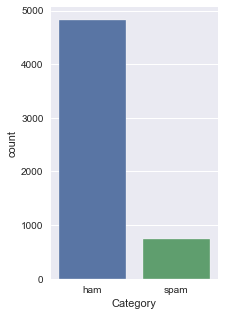

In [11]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(3,5))
sns.countplot(x = df.Category)
plt.show()

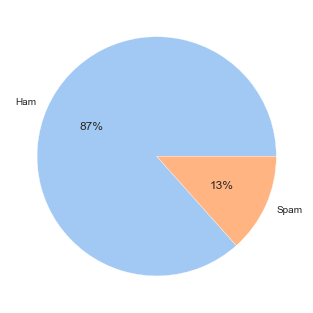

In [12]:
label = ['Ham','Spam']
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Category'].value_counts(),labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Let's check the amount of words in each Category

<AxesSubplot:xlabel='word_count', ylabel='Category'>

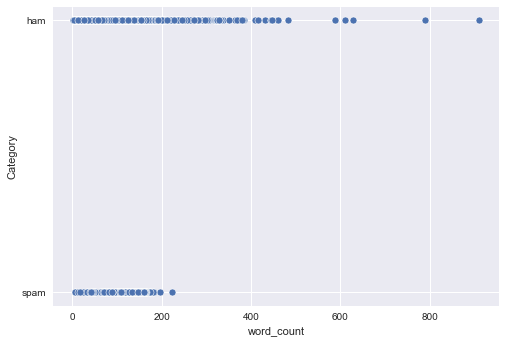

In [13]:
df['word_count'] = df['Message'].apply(len)
sns.scatterplot(x = df['word_count'],y = df['Category'])

As we can see ham type messages are longer than spam type messages. 

# 3- Cleaning the Data
    
   

We realized that our data is imbalanced because one of our classes has a significantly lower amount of cases compared to the other class (can also be seen in our graphs).

In order to balance out the data we'll pick 747 cases of "ham" messages.

In [42]:
ham=df[df['Category']=='ham']
spam=df[df['Category']=='spam']

In [15]:
ham=ham.sample(747)

Now, let's see the data

In [16]:
ham.shape,spam.shape

((747, 3), (747, 3))

As seen above, our data is now balanced, so it's time to put our samples in our DataFrame 

In [43]:
df = ham.append(spam,ignore_index=True)

In [44]:
df

,Category,Message,word_count
0,ham,It's ok i wun b angry. Msg u aft i come home t...,53
1,ham,tap & spile at seven. * Is that pub on gas st ...,72
2,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,103
3,ham,Ok...,5
4,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",142
...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


# 4- Splitting the Data


Here we divided our data into a test set (20%) and a train set (80%)

In order to run our codes we changed our strings- ham and spam into numbers:

In [45]:
# Data frame is created under column name Category and Message
data_frame = pd.DataFrame(df, columns=["Category", "Message"])
 
# Data of Category is converted into Binary Data
df_one = pd.get_dummies(data_frame["Category"])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)
 
# Category column is dropped
df_two = df_two.drop(["Category"], axis=1)
 
# We want ham =0 and spam =1 So we drop Male column here
df_two = df_two.drop(["ham"], axis=1)
 
# Rename the Column
binary_df = df_two.rename(columns={"spam": "Category"})
 
#Adding the word count column
binary_df['word_count'] = df['Message'].apply(len)

# Print the Result
binary_df

,Category,Message,word_count
0,0,It's ok i wun b angry. Msg u aft i come home t...,53
1,0,tap & spile at seven. * Is that pub on gas st ...,72
2,0,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,103
3,0,Ok...,5
4,0,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L...",142
...,...,...,...
1489,1,Want explicit SEX in 30 secs? Ring 02073162414...,90
1490,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
1491,1,Had your contract mobile 11 Mnths? Latest Moto...,160
1492,1,REMINDER FROM O2: To get 2.50 pounds free call...,147


In [46]:
x_train, x_test, y_train, y_test = train_test_split(binary_df['Message'], binary_df['Category'], test_size = 0.2, random_state=0, shuffle = True, stratify=df['Category'])

In [47]:
x_train

124                                I said its okay. Sorry
662                           It vl bcum more difficult..
1007    You have WON a guaranteed £1000 cash or a £200...
1151    Do you ever notice that when you're driving, a...
1096    This message is brought to you by GMW Ltd. and...
                              ...                        
1321    Show ur colours! Euro 2004 2-4-1 Offer! Get an...
312     BABE !!! I miiiiiiissssssssss you ! I need you...
268     That depends. How would you like to be treated...
272              Die... Now i have e toot fringe again...
934     FREE entry into our £250 weekly comp just send...
Name: Message, Length: 1195, dtype: object

In [48]:
y_train

124     0
662     0
1007    1
1151    1
1096    1
       ..
1321    1
312     0
268     0
272     0
934     1
Name: Category, Length: 1195, dtype: uint8

In [49]:
x_test

510     You only hate me. You can call any but you did...
1320    U can WIN £100 of Music Gift Vouchers every we...
1168    1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
574     Goodmorning, today i am late for  &lt;DECIMAL&...
512     So many people seems to be special at first si...
                              ...                        
488     My uncles in Atlanta. Wish you guys a great se...
1041    FREE2DAY sexy St George's Day pic of Jordan!Tx...
1464    u r subscribed 2 TEXTCOMP 250 wkly comp. 1st w...
1141    Hey Boys. Want hot XXX pics sent direct 2 ur p...
1132    INTERFLORA - It's not too late to order Inter...
Name: Message, Length: 299, dtype: object

In [50]:
y_test

510     0
1320    1
1168    1
574     0
512     0
       ..
488     0
1041    1
1464    1
1141    1
1132    1
Name: Category, Length: 299, dtype: uint8

# 5- Dummy Model


A dummy classifier is used as a simple classifier to compare with more complex classifiers.

In [53]:
dc_clf = DummyClassifier(strategy="most_frequent")

dc_clf.fit(x_train,y_train)
score = dc_clf.score(x_test,y_test)
print("dummy classifier:{}".format(score))

dummy classifier:0.4983277591973244


Our dummy classifier gives us accuracy of 49%, thats around 50%. 


# 6- Comparing 3 Models


### Our data in this project is type string so we used models that work on type string data 

#### First model: Random Forest Classifier:

The randomforest classifier has multiple decision trees. In order to enhance its accuracy and avoid overfitting it uses randomness.
the algorithm makes decision trees based on a random selection of data samples and get predictions from every tree. After that, they select the best viable solution through votes. 

In [26]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))]) 
#njobs=-1 will use all the cores of CPU

In [27]:
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [28]:
rfc_pred = clf.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
confusion_matrix(y_test, rfc_pred)

array([[150,   0],
       [ 16, 133]], dtype=int64)

In [30]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       150
           1       1.00      0.89      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



#### Second model: Support Vector Machines:

The support vector machine algorithm helps to classify data points with linear classification. 


In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane (a subspace whose dimension is one less than that of its surrounding space) that differentiates the two classes very well

In [31]:
from sklearn.svm import SVC

In [32]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [55]:
svc_pred = clf.predict(x_test)
confusion_matrix(y_test, svc_pred)

array([[150,   0],
       [ 14, 135]], dtype=int64)

In [56]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       150
           1       1.00      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



#### Third model: Logistic Regression

Logistic regression is a statistical analysis method to predict a binary outcome, such as spam or ham, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [58]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])
clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [59]:
l_pred = clf.predict(x_test)
confusion_matrix(y_test, l_pred)

array([[150,   0],
       [ 14, 135]], dtype=int64)

In [60]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       150
           1       1.00      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



As we can see our first model is not performing as good as the other two, therefore our best models are logistic regression and support vector machines.

The reason that our models are so close in accuracy is because we don't have enough data for the models to work on, and that's the reason they all work the same and get the same answers.

However, we can see that in our second model: Support Vector Machines, the clasisification report came out different, but the accuracy is similar to the other two models. 

# 7- Error Model


We decided to use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) in order to score our models.

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.
This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.


#### Random Forest Classifier:

In [62]:
roc_auc_score(y_test,rfc_pred)

0.9463087248322148

####  Support Vector Machines:

In [63]:
roc_auc_score(y_test,svc_pred)

0.9530201342281879

#### Logistic Regression:

In [64]:
roc_auc_score(y_test,l_pred)

0.9530201342281879

# 8- Conclusion

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points. Therefore, we can see that our Dummy Model worked accordingly. 

In comparison, we saw that the Logistic Regression and Support Vector Machines were the best models, both giving us 94.6% ~95% accuracy. 